In [5]:
pip install scikit-learn-extra

In [6]:
'''
@author=='shyamgupta196
python version used==3.8.3
'''

"\n@author=='shyamgupta196\npython version used==3.8.3\n"

In [7]:
from sklearn_extra.cluster import KMedoids 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('heart.csv')

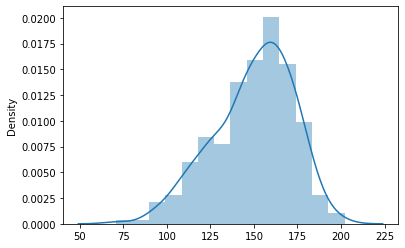

In [9]:
sns.distplot(df[['thalach']])

In [10]:
scale = StandardScaler().fit_transform(df)

In [11]:
df = pd.DataFrame(scale,columns=df.columns)

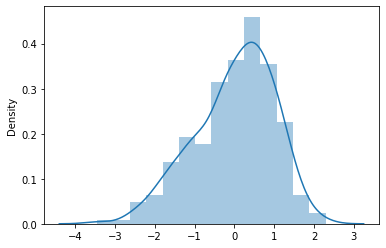

In [12]:
sns.distplot(df[['thalach']])

In [13]:
inertias = []
for i in range(1,10):
  km = KMedoids(i)
  preds = km.fit(df[['thalach']])
  inertias.append(km.inertia_)


In [14]:
#using elbow method to find the number of clusters with least SSE

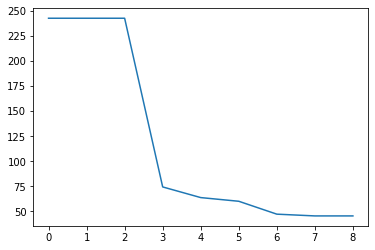

In [15]:
plt.plot(inertias)

In [16]:
#looks like 4 is value of clusters we were looking at so lets use thatb

In [17]:
km = KMedoids(4).fit(df[['thalach']])

In [18]:
x=df[['thalach']]

preds = km.predict(x)
print(preds)
df['predictions_thalach'] = preds
# df.set_index('predictions_thalach',inplace=True)

[1 0 0 0 2 1 2 0 2 0 2 1 0 1 2 2 0 3 0 1 2 0 0 1 0 2 2 3 2 1 0 1 0 1 3 2 0
 2 1 1 1 0 1 1 0 0 0 2 3 2 1 1 1 0 0 2 0 0 0 2 3 2 0 3 2 0 1 0 0 2 1 2 0 0
 2 2 2 2 0 2 0 0 2 0 3 2 1 2 2 3 0 0 0 2 1 3 2 1 2 0 0 1 0 0 2 3 3 1 2 2 2
 0 3 2 2 0 0 2 0 1 3 0 0 2 0 0 1 0 0 3 2 2 2 2 2 2 3 1 3 3 2 0 0 1 3 1 1 0
 0 1 1 3 2 1 1 3 0 0 1 2 0 2 0 0 0 3 3 2 1 2 1 0 2 0 3 3 2 2 3 3 3 3 0 2 3
 2 1 3 2 2 1 3 3 1 2 1 1 2 3 2 0 1 3 1 1 2 1 2 1 2 1 1 1 1 1 1 3 3 3 1 2 3
 0 3 3 3 3 3 2 3 1 3 1 3 3 0 0 0 2 2 3 1 3 3 3 2 1 3 0 1 3 1 3 3 3 1 3 3 2
 0 2 2 3 0 3 3 3 3 3 3 1 1 3 2 3 0 3 1 1 3 3 2 1 0 1 3 2 2 1 3 2 1 1 1 1 1
 1 3 3 3 1 3 0]


In [19]:
center = km.cluster_centers_
print(center[1][0])

-0.2469402439592336


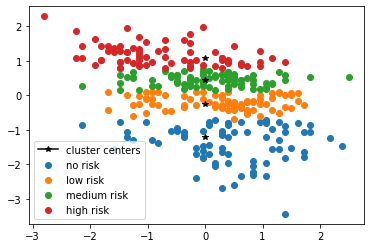

In [20]:
df1 = df[df.predictions_thalach==3]
df2 = df[df.predictions_thalach==1]
df3 = df[df.predictions_thalach==2]
df4 = df[df.predictions_thalach==0]

plt.plot(center[0][0],marker='*',color='black',label='cluster centers')
plt.plot(center[1][0],marker='*',color='black')
plt.plot(center[2][0],marker='*',color='black')
plt.plot(center[3][0],marker='*',color='black')

plt.scatter(y=df1.thalach,x=df1.age,label='no risk',)
plt.scatter(y=df2.thalach,x=df2.age,label='low risk')
plt.scatter(y=df3.thalach,x=df3.age,label='medium risk')
plt.scatter(y=df4.thalach,x=df4.age,label='high risk')
plt.legend()
plt.show()

In [21]:
#thank you 